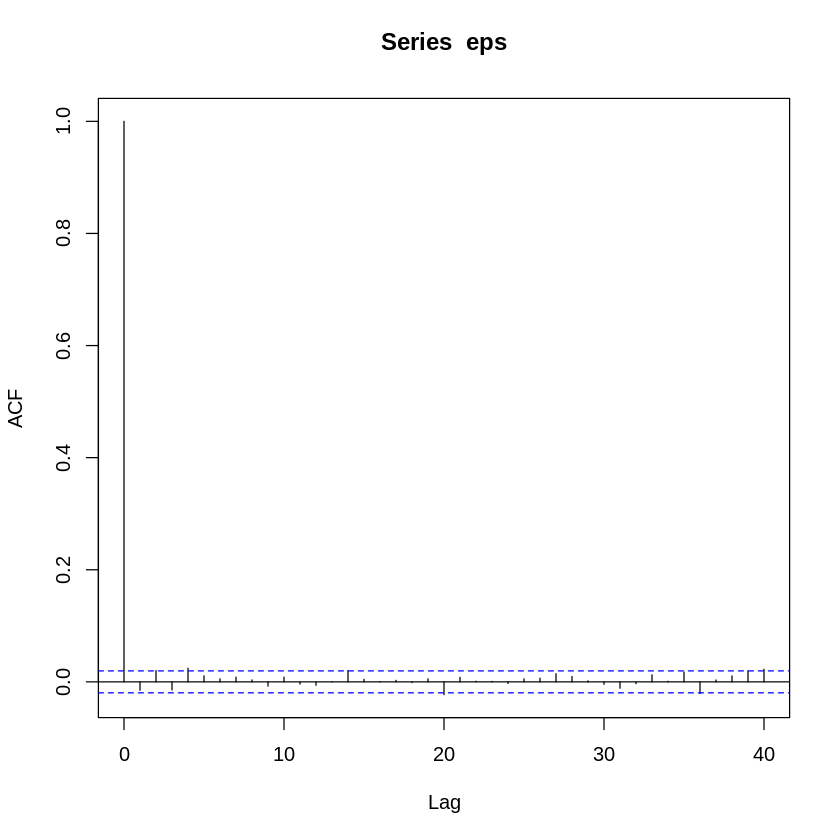

In [1]:
## https://www.quantstart.com/articles/Generalised-Autoregressive-Conditional-Heteroskedasticity-GARCH-p-q-Models-for-Time-Series-Analysis/
set.seed(2)
a0 <- 0.2
a1 <- 0.5
b1 <- 0.3
w <- rnorm(10000)
eps <- rep(0, 10000)
sigsq <- rep(0, 10000)
for (i in 2:10000) {
  sigsq[i] <- a0 + a1 * (eps[i-1]^2) + b1 * sigsq[i-1]
  eps[i] <- w[i]*sqrt(sigsq[i])
}
acf(eps)

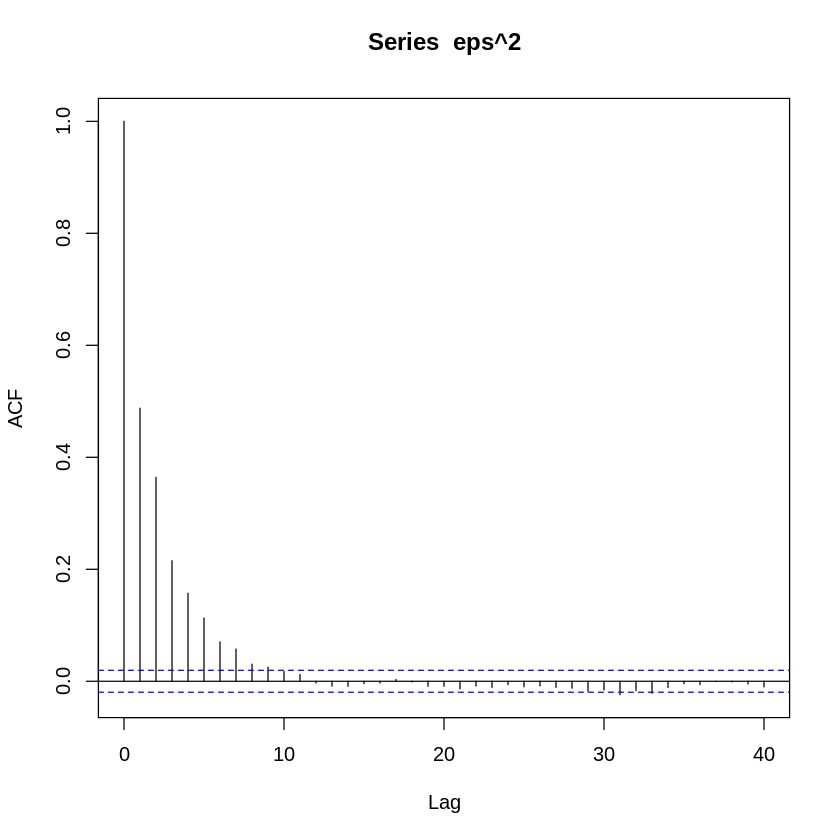

In [2]:
acf(eps^2)

In [3]:
require(tseries)

Loading required package: tseries
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


In [4]:
eps.garch <- garch(eps, trace=FALSE)
confint(eps.garch)

,2.5 %,97.5 %
a0,0.1786255,0.2172683
a1,0.4271900,0.5044903
b1,0.2861566,0.3602687


In [5]:
require(quantmod)
getSymbols("^FTSE")

Loading required package: quantmod
Loading required package: xts
Warning message:
“package ‘xts’ was built under R version 3.6.2”Loading required package: zoo
Warning message:
“package ‘zoo’ was built under R version 3.6.2”
Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: TTR
Warning message:
“package ‘TTR’ was built under R version 3.6.2”Version 0.4-0 included new data defaults. See ?getSymbols.
‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.

Warning message:
“^FTSE contains missing values. Some functions will not work if objec

[1] "^FTSE"

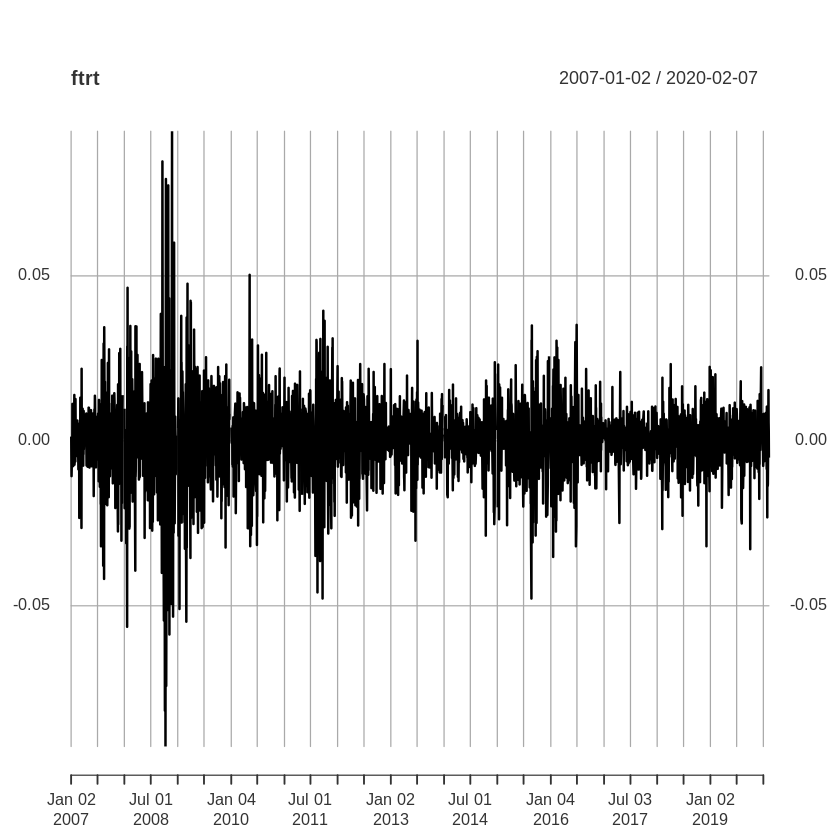

In [7]:
ftrt = diff(log(Cl(FTSE)))
plot(ftrt)

In [8]:
ft <- as.numeric(ftrt)
ft <- ft[!is.na(ft)]

In [9]:
ftfinal.aic <- Inf
ftfinal.order <- c(0,0,0)
for (p in 1:4) for (d in 0:1) for (q in 1:4) {
  ftcurrent.aic <- AIC(arima(ft, order=c(p, d, q)))
  if (ftcurrent.aic < ftfinal.aic) {
    ftfinal.aic <- ftcurrent.aic
    ftfinal.order <- c(p, d, q)
    ftfinal.arima <- arima(ft, order=ftfinal.order)
  }
}

Warning message in arima(ft, order = c(p, d, q)):
“possible convergence problem: optim gave code = 1”Warning message in log(s2):
“NaNs produced”

In [10]:
ftfinal.order

[1] 4 0 4

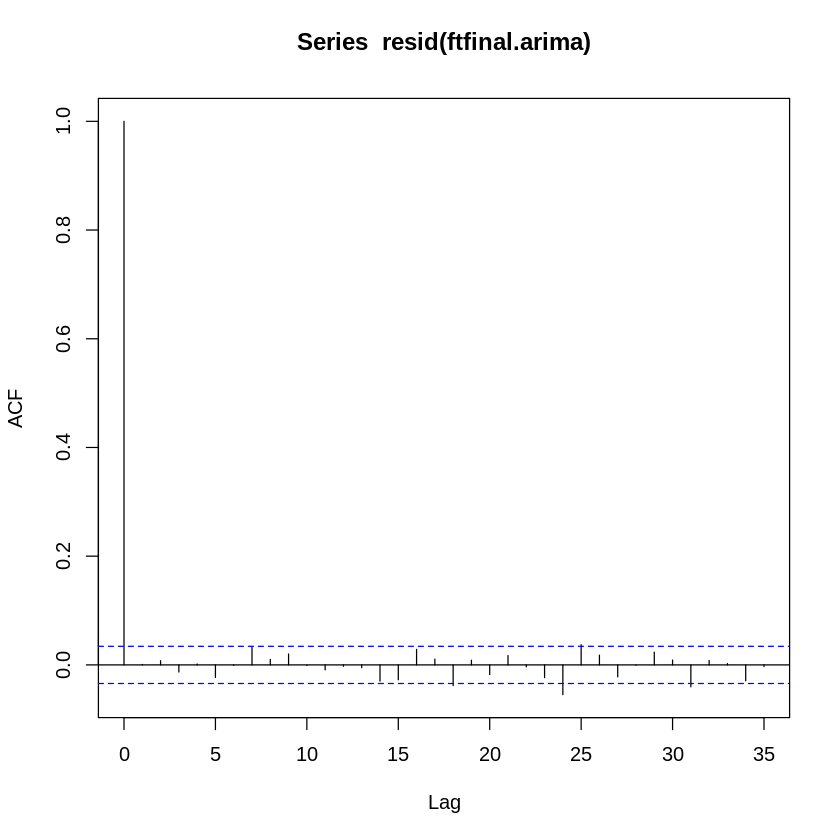

In [11]:
acf(resid(ftfinal.arima))

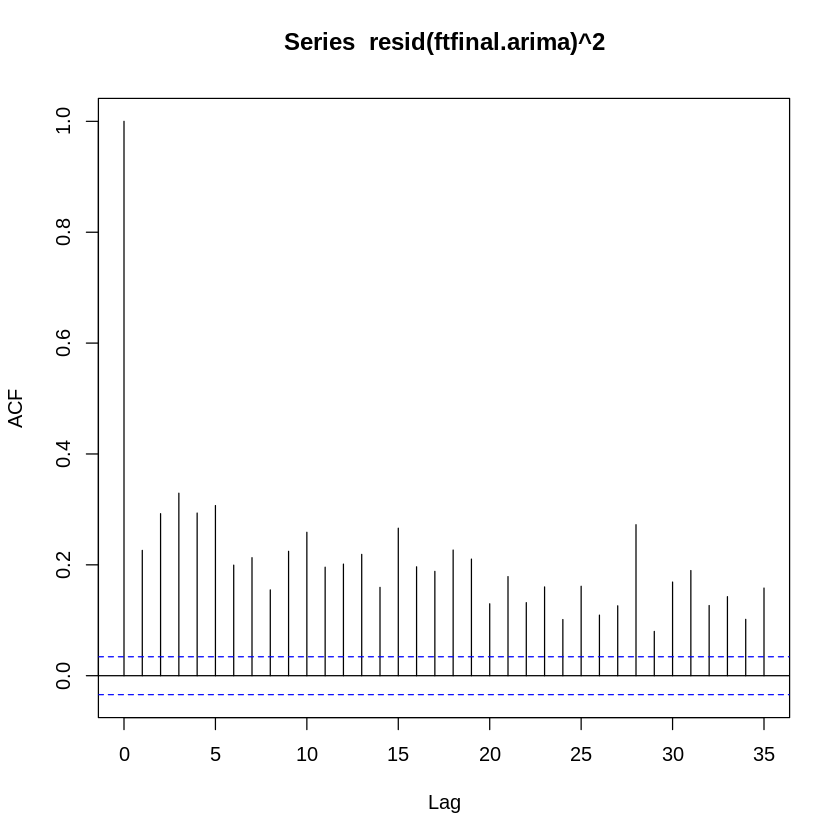

In [12]:
acf(resid(ftfinal.arima)^2)


Call:
garch(x = ft, trace = F)

Coefficient(s):
       a0         a1         b1  
2.538e-06  1.203e-01  8.601e-01  


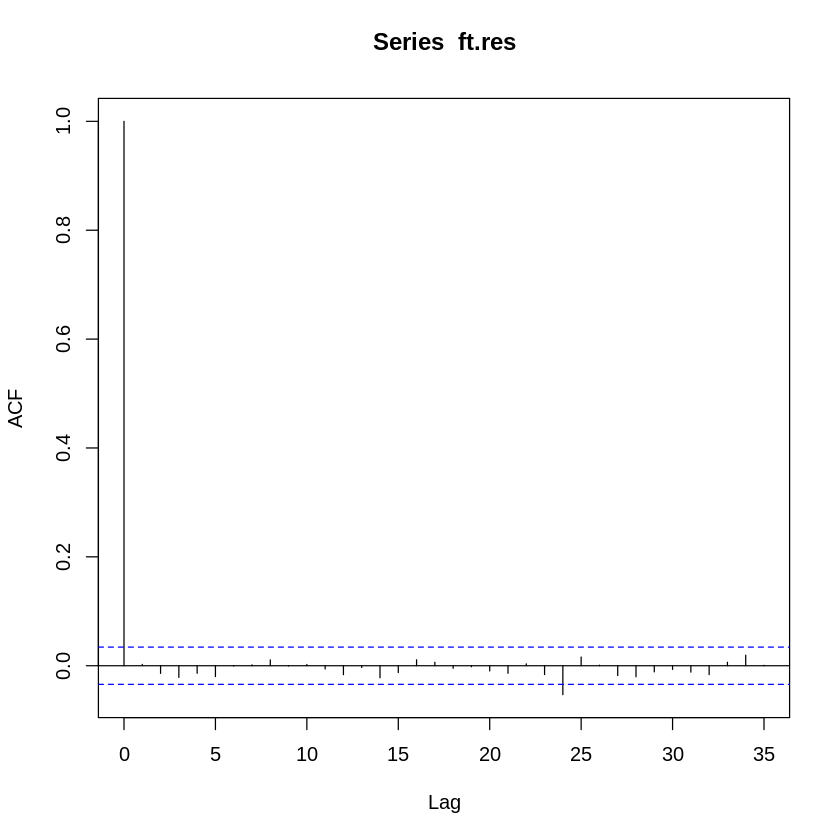

In [15]:
ft.garch <- garch(ft, trace=F)
ft.garch
ft.res <- ft.garch$res[-1]
acf(ft.res)

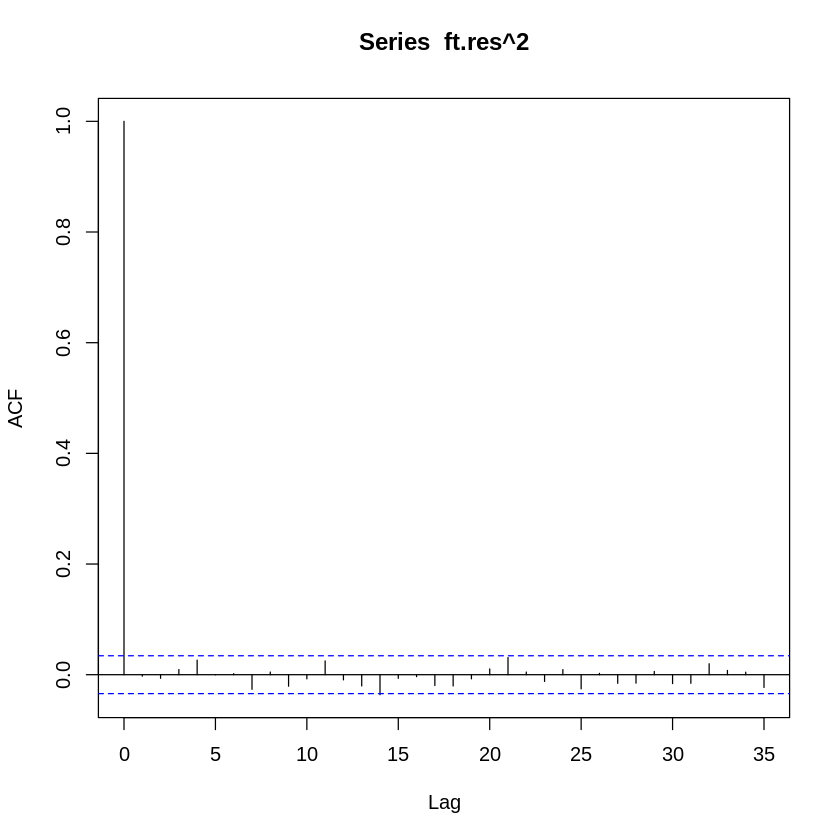

In [14]:
acf(ft.res^2)